## Step by Step Exploration of the dataset 

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [13]:
# Calculate class counts for the train set
train_counts = train['class'].value_counts().reset_index()
train_counts.columns = ['class', 'Count']
train_counts['Split'] = 'Train'

# Calculate class counts for the test set
test_counts = test['class'].value_counts().reset_index()
test_counts.columns = ['class', 'Count']
test_counts['Split'] = 'Test'

df_counts = pd.concat([train_counts, test_counts], ignore_index=True)

Data Summary (Counts):
class      0      1
Split              
Train  18813  17105
Test    4668   4312
------------------------------


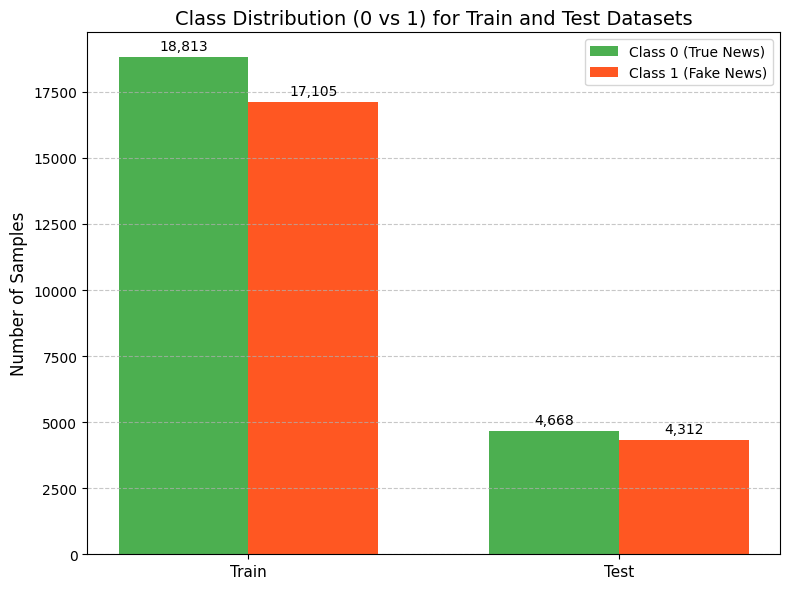

In [15]:
df_pivot = df_counts.pivot(index='Split', columns='class', values='Count')
df_pivot = df_pivot.reindex(['Train', 'Test']) # Ensure order is Train then Test

print("Data Summary (Counts):")
print(df_pivot.fillna(0).astype(int)) # Print summary table
print("-" * 30)

# ----------------------------------------------------------------------
# 4. Draw the Grouped Bar Chart
# ----------------------------------------------------------------------

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35  # Width of the bars
x = np.arange(len(df_pivot.index))  # the label locations (Train, Test)

# Use .get(0, 0) and .get(1, 0) to safely handle cases where a class might be missing
class_0_counts = df_pivot.get(0, pd.Series(0, index=df_pivot.index))
class_1_counts = df_pivot.get(1, pd.Series(0, index=df_pivot.index))

# Draw the bars for Class 0 and Class 1
rects1 = ax.bar(x - width/2, class_0_counts, width, label='Class 0 (True News)', color='#4CAF50') # Green
rects2 = ax.bar(x + width/2, class_1_counts, width, label='Class 1 (Fake News)', color='#FF5722') # Orange

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Number of Samples', fontsize=12)
ax.set_title('Class Distribution (0 vs 1) for Train and Test Datasets', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_pivot.index, fontsize=11) # 'Train', 'Test'
ax.legend(loc='upper right')

# Function to attach a text label above each bar showing its count
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        # Only label non-zero bars
        if height > 0:
            ax.annotate(f'{height:,}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=10)

autolabel(rects1)
autolabel(rects2)

ax.set_ylim(bottom=0)
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()